# 0. Import Packages & Load Data

In [ ]:
# import packages
import pandas as pd
from google.colab import drive # allow google drive integration
drive.mount('/content/drive')
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive


In [ ]:
# load in data
df = pd.read_csv('/content/drive/Shareddrives/DEEP 2022/Project/clean_lead.csv')
df.head()
#df[['Pct5']]

,Unnamed: 0,GEO_ID,Poverty,Bachelor,White,White-NH,Black,Black-NH,Asian,Asian-NH,...,Black-H,Asian-H,AmericanIndian-H,NHPI-H,Other-H,Multi-H,OldHousing,NumBll5Plus,NumScreen,Pct5Plus
0,0,42101000100,11.7,79.8,77.2,73.6,10.5,10.5,8.6,8.6,...,0.0,0.0,0.0,0.0,1.8,0.0,65.7,0.0,100.0,0.0
1,1,42101000402,10.7,74.5,90.0,88.4,2.0,2.0,7.6,7.6,...,0.0,0.0,0.0,0.0,0.0,0.0,19.3,0.0,41.0,0.0
2,3,42101000700,28.8,77.5,65.8,59.1,11.0,11.0,22.0,21.5,...,0.0,0.5,0.0,0.0,0.0,0.0,53.0,0.0,57.0,0.0
3,4,42101000803,14.9,85.3,90.6,88.3,0.5,0.5,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,63.0,0.0
4,5,42101000804,7.2,80.9,84.4,70.9,2.6,2.6,10.8,10.8,...,0.0,0.0,0.0,0.0,0.0,0.0,41.7,0.0,86.0,0.0


# 1. Data Cleaning

Cleaning ideas:
1. Let's first explore the types of data in our dataset: bold text we have a bunch of floats, 1 integer, and 1 boolean
2. Do we have null entries? We have no NaN entries at all! bold text We do have a lot of zeroes, but them seem to be meaningful zeroes. 
3. How many people are surveyed for each GEO_ID? Where should we set our threshold for too few surveyed? In 2 of the 251 regions, fewer than 8 children were surveyed for blood lead levels. In 31 of the 251 regions, fewer than 100 children were surveyed. Set up a way to select only rows with a minimum number of children surveyed.
4. Remove columns that appear to not be useful. Removed the "IsRedacted" column because it is not useful to us.
5. Compared Asian to AsianNH + AsianH. The values match up!

In [ ]:
#summary of the cleaning we decided to do. See below for more details
df.drop(labels=["IsRedacted"], axis=1, inplace=True)

cutoff_point = 30 #desired minimum number of chilren screened in a given GEO_ID
df_selected = df[df['NumScreen'] >= cutoff_point]
df_selected['NumScreen'].sort_values()

df_selected.to_csv('/content/drive/Shareddrives/DEEP 2022/Project/clean_lead.csv')

KeyError: ignored

In [ ]:
#the types of each column
df.dtypes

In [ ]:
#let's see how many null values are in each column
df.isnull().sum() #no null values at all omg

In [ ]:
df.drop(labels=["IsRedacted"], axis=1, inplace=True)
df.dtypes

In [ ]:
#let's print out the number of ppl surveyed for blood levels per GEO_ID
df[['GEO_ID','NumScreen']][df['NumScreen']<100].sort_values(by='NumScreen', ascending=True).head(251)

In [ ]:
#just viewing
#df[['GEO_ID','NumScreen']][df['NumScreen']<100].sort_values(by='NumScreen', ascending=True).head(251).shape

In [ ]:
#let's write the code for dropping rows based on their the number of children surveyed for blood lead levles
#select rows to make a subset of the original dataset
cutoff_point = 30 #desired minimum number of chilren screened in a given GEO_ID
df_selected = df[df['NumScreen'] >= cutoff_point]
df_selected['NumScreen'].sort_values()

In [ ]:
df['Asian-H'].sum() + df['Asian-NH'].sum()


# 2. Data Visualization

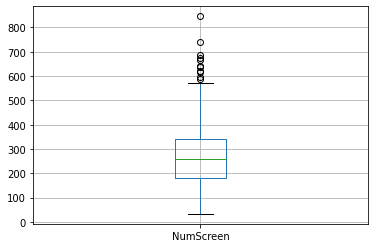

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column = ['NumScreen'])

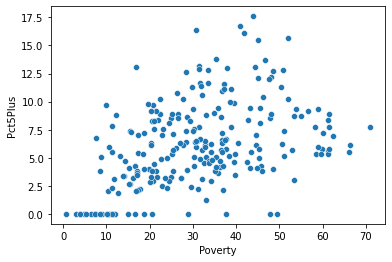

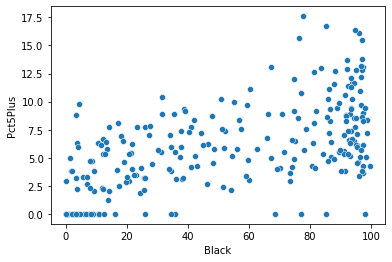

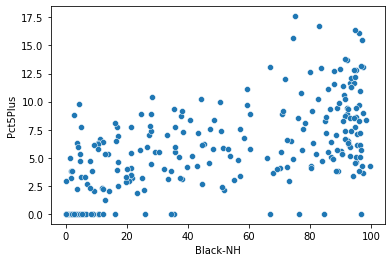

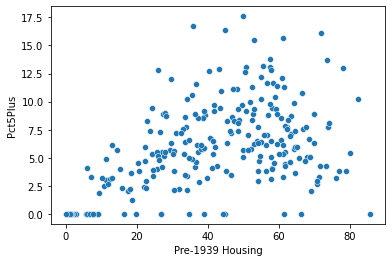

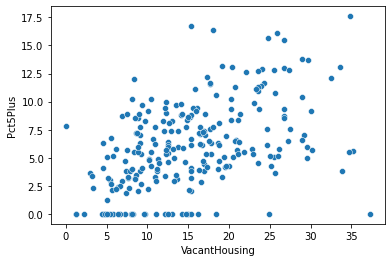

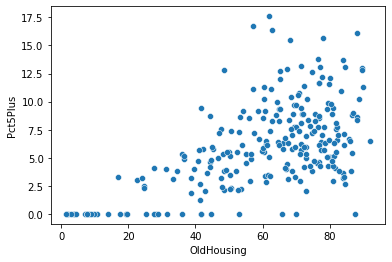

In [ ]:
import seaborn as sns
#
def create_plots(ColumnNames):
  for column in ColumnNames:
    plt.figure()
    sns.scatterplot(x = column, y = 'Pct5Plus', data = df)
create_plots(['Poverty', 'Black', 'Black-NH', 'Pre-1939 Housing', 'VacantHousing', 'OldHousing'])

# Modeling


In [ ]:
# Split Up data into training and test data
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(df[['Poverty','Black']],df['Pct5Plus'])
#x_train
# x_test
#y_train
# y_test

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#model = LinearRegression()

#model.fit(x_train, y_train)

##model.coef_


In [ ]:
#let's find mean squared error
#predictions = model.predict(x_test)

from sklearn import metrics

#mse = metrics.mean_squared_error(y_test, predictions)

#rmse = np.sqrt(mse) 
#mse
#rmse

In [ ]:
# make a dataframe with just the independent variables 
indep_df = df.drop('Pct5Plus', axis = 1)
indep_df

,Unnamed: 0,GEO_ID,Poverty,Bachelor,White,White-NH,Black,Black-NH,Asian,Asian-NH,...,White-H,Black-H,Asian-H,AmericanIndian-H,NHPI-H,Other-H,Multi-H,OldHousing,NumBll5Plus,NumScreen
0,0,42101000100,11.7,79.8,77.2,73.6,10.5,10.5,8.6,8.6,...,3.6,0.0,0.0,0.0,0.0,1.8,0.0,65.7,0.0,100.0
1,1,42101000402,10.7,74.5,90.0,88.4,2.0,2.0,7.6,7.6,...,1.6,0.0,0.0,0.0,0.0,0.0,0.0,19.3,0.0,41.0
2,3,42101000700,28.8,77.5,65.8,59.1,11.0,11.0,22.0,21.5,...,6.7,0.0,0.5,0.0,0.0,0.0,0.0,53.0,0.0,57.0
3,4,42101000803,14.9,85.3,90.6,88.3,0.5,0.5,5.0,5.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,63.0
4,5,42101000804,7.2,80.9,84.4,70.9,2.6,2.6,10.8,10.8,...,13.5,0.0,0.0,0.0,0.0,0.0,0.0,41.7,0.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,245,42101038200,24.5,5.4,60.9,50.7,17.2,16.1,1.0,1.0,...,10.2,1.1,0.0,0.0,0.0,13.1,0.0,81.9,17.0,211.0
242,246,42101038300,53.0,5.2,26.9,9.2,30.3,24.2,0.0,0.0,...,17.7,6.1,0.0,5.3,0.0,33.1,3.1,78.4,15.0,262.0
243,247,42101038800,8.7,59.8,54.7,53.4,37.4,37.2,4.1,4.1,...,1.3,0.2,0.0,0.0,0.0,0.9,0.0,79.3,11.0,214.0
244,248,42101038900,25.4,17.9,8.8,8.4,89.8,89.0,0.6,0.6,...,0.4,0.8,0.0,0.0,0.0,0.1,0.0,41.1,9.0,158.0


In [ ]:
negative_columns = ['Bachelor', 'White', 'White-NH', 'Asian', 'Asian-NH', 'OwnerOccupied', 'White-H']
positive_columns = ['Poverty','Black','Black-NH','Pre-1939 Housing','VacantHousing','OldHousing']
all_columns = ['Bachelor', 'White', 'White-NH', 'Asian', 'Asian-NH', 'OwnerOccupied', 'White-H','Poverty','Black','Black-NH','Pre-1939 Housing','VacantHousing','OldHousing']
#all_columns = negative_columns.append(positive_columns)
regression_df = df[all_columns]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(regression_df,df['Pct5Plus'])

In [ ]:
# Annie tries to run through all pairs with negative correlations (negative according to our heatmap)
# make list of our negative pairs of variables
# let's try with pairs of independent variables
# Fernando abstracted this into a function for more versatility



def variable_select(x_train, x_test, all_columns, test_combos):
  indexlst = []
  for item in test_combos:
    indexlst.append(all_columns.index(item))
  x_test_pair = []
  for idx in range(len(x_test)):
    old_row = x_test[idx]
    new_row = []
    for idx2 in indexlst:
      new_row.append(old_row[idx2])
    x_test_pair.append(new_row)
  indexlst2 = []
  for item2 in test_combos:
    indexlst.append(all_columns.index(item))
    x_train_pair = []
  for idx in range(len(x_train)):
    old_row2 = x_train[idx]
    new_row2 = []
    for idx2 in indexlst:
      new_row.append(old_row2[idx2])
    x_train_pair.append(new_row2)
  return x_train_pair, x_test_pair    
  


def unique_combos(listx):
  """
  creates a list of every unique pair of elements in a list
  """
  existing_combos = []
  for item1 in listx:
    for item2 in listx:
      lst = [item1,item2]
      if [item2,item1] not in existing_combos:
        existing_combos.append(lst)
  return existing_combos
#print(unique_combos(negative_columns))

def regression_tester(explanatory_vars,test_var,n,x_train,x_test,y_train,y_test,all_columns):
  """
  returns the rmses from reression models created from two explanatory variables
  and a response variable
  inputs:
    explanatory_vars:
    a list of strings, where each string refers to a column in a dataframe
    test_var:
    a string referring to a column in a dataframe that will be used as the response variable
  Outputs:
    returns a list of lists [x1,x2,mse,rmse], as well as the combination that produces the 
    lowest rmse
  """
  total_results = []
  #use this to find the lowest rmse
  sorting_start = 1000
  minimum_rmse = []
  test_combos = explanatory_vars
  for x2 in test_combos: #note we have quite a bit of repetition going on here
        #test_result = []
        # split data set
        mse_avg = 0
        rmse_avg = 0
        for i in range(n):
          x_train_pair, x_test_pair = x_train[[x2]], x_test[[x2]]  

          # train model
          model = LinearRegression() #initializes a linear regression model object
          model.fit(x_train_pair, y_train) #modifies the object, called "model"

          # test model
          predictions = model.predict(x_test_pair)
          intercepts = model.intercept_
          coeff = model.coef_
          mse = metrics.mean_squared_error(y_test, predictions)
          mse_avg += mse
          rmse = np.sqrt(mse)
          rmse_avg += rmse
        rmse_avg = rmse_avg / n
        mse_avg = mse_avg / n
        #used to find the combination that produces the lowest rmse
        if rmse_avg < sorting_start:
          #print(rmse)
          sorting_start = rmse_avg
          minimum_rmse = [x2,rmse_avg,intercepts,coeff]
        #adding data from the test to a list
        total_results.append([x2,rmse_avg,intercepts,coeff])
  total_results.sort(key = lambda pair: pair[1])
  return minimum_rmse, total_results
positive_corr = regression_tester(positive_columns,'Pct5Plus',1,x_train,x_test,y_train,y_test,all_columns)
negative_corr = regression_tester(negative_columns,'Pct5Plus',1,x_train,x_test,y_train,y_test,all_columns)
print(negative_corr)
print(positive_corr)
#this is what the code returns 
#[['Black', 'OldHousing'], 7.710121879392229, 2.765590272076573]
#[['White-NH', 'Asian'], 9.002568668539878, 2.988825000585436]    
#black
#white

(['White-NH', 3.2277305789805704, 7.887203362071185, array([-0.07221208])], [['White-NH', 3.2277305789805704, 7.887203362071185, array([-0.07221208])], ['White', 3.269735180635719, 8.229279940663996, array([-0.07086687])], ['Bachelor', 3.657673403950039, 7.594867510024394, array([-0.07945759])], ['Asian-NH', 3.978840918446448, 7.064826943177015, array([-0.17352541])], ['Asian', 3.9790940878762626, 7.07004541622703, array([-0.17256541])], ['OwnerOccupied', 4.293570400087825, 8.396875619486554, array([-0.04527412])], ['White-H', 4.313657106713685, 6.473526065653346, array([-0.07504488])]])
(['OldHousing', 3.243501610219621, 0.29017884211039835, array([0.09552546])], [['OldHousing', 3.243501610219621, 0.29017884211039835, array([0.09552546])], ['Black', 3.3940840586662318, 2.9081182433502977, array([0.05827829])], ['VacantHousing', 3.4147051106109365, 3.119911857988883, array([0.19374286])], ['Black-NH', 3.438557649702172, 3.0655895544645615, array([0.05692935])], ['Pre-1939 Housing', 3.6

In [ ]:
def model_printer(vars,x_train,x_test):
  x_train_pair, x_test_pair = x_train[vars], x_test[vars]  

          # train model
  model = Lasso(alpha = 11, tol = 10**-5) #initializes a linear regression model object
  model.fit(x_train_pair, y_train) #modifies the object, called "model"
  # test model
  predictions = model.predict(x_test_pair)
  intercepts = model.intercept_
  coeff = model.coef_
  mse = metrics.mean_squared_error(y_test, predictions)
  rmse = np.sqrt(mse)
  return predictions,rmse
model_printer(['White','Asian-NH'],x_train,x_test)

(array([4.67110142, 7.82125891, 5.81977763, 5.05399349, 7.68202543,
        7.8328617 , 5.87199018, 7.74584077, 6.38831434, 6.46953387,
        7.42096265, 2.80305222, 7.74003938, 2.42016015, 4.65369723,
        6.17366272, 2.65801735, 6.12145017, 5.83718181, 4.02714657,
        4.66530002, 2.33313923, 7.69942961, 3.35998614, 7.8270603 ,
        7.06707756, 7.68202543, 7.56599753, 3.49341823, 2.98289547,
        7.38615428, 7.06707756, 7.7168338 , 7.82125891, 6.3186976 ,
        6.53915061, 6.81181618, 7.65881985, 5.76176368, 7.80385472,
        3.00610105, 4.30561353, 5.9706139 , 6.65517851, 6.64357572,
        7.80385472, 6.94524826, 6.40571852, 6.13885435, 6.77700781,
        7.54859334, 7.54859334, 2.58259921, 6.06343622, 7.21791383,
        6.65517851, 2.61160619, 6.02862785, 4.75812234, 7.5950045 ,
        4.02134518, 7.67622403]), 3.375177783980339)

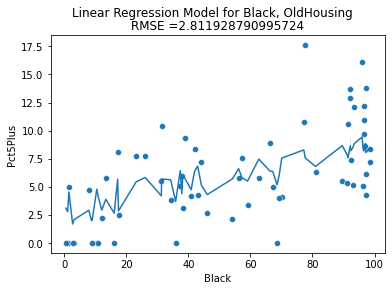

NameError: ignored

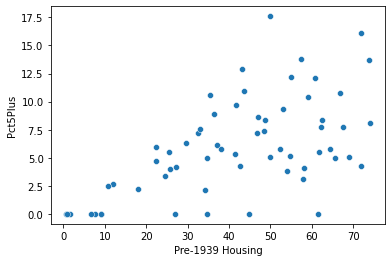

In [ ]:
predictions, rmse = model_printer(['Black', 'Pre-1939 Housing'],x_train,x_test)
plt.figure()
sns.scatterplot(x = x_test['Black'],y = y_test)
sns.lineplot(x = x_test['Black'],y= predictions)
# x_line = np.arange(0,101)
# y_line = .05969848 * x_line + 0.01003365650673782 + .06860645
# sns.lineplot(x_line,y_line)
plt.suptitle("Linear Regression Model for Black, OldHousing")
plt.title("RMSE =2.811928790995724")
plt.show()
plt.figure()
sns.scatterplot(x = x_test['Pre-1939 Housing'],y = y_test)
x_line2 = np.arange(0,101)
y_line2 = .06860645 * x_line + 0.01003365650673782 + .05969848
sns.lineplot(x_line2,y_line2)
plt.suptitle("Linear Regression Model for Black, OldHousing")
plt.title("RMSE =2.811928790995724")
plt.show()


NameError: ignored

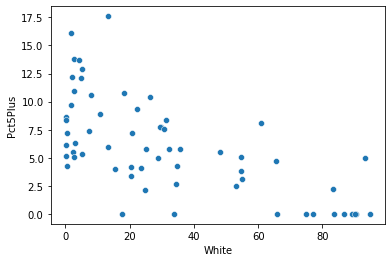

In [ ]:
plt.figure()
sns.scatterplot(x = x_test['White'],y = y_test)
x_line3 = np.arange(0,101)
y_line3 = -0.06816319 * x_line + 8.903715374355706
sns.lineplot(x_line3,y_line3)
plt.suptitle("Linear Regression Model for White, Asian")
plt.title("RMSE = 3.1808201189262504 ")
plt.show()

# Try to Fix Modeling


In [ ]:
# Code for Single and Multiple Linear Regression (the other model produced overfitted models)
vars = ['Black', 'White', 'Pre-1939 Housing', 'White-NH']

# Split Data
indep_df = df.drop('Pct5Plus', axis = 1)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(indep_df,df['Pct5Plus'])

In [ ]:
x_train[vars]

,Black
180,86.0
160,65.9
106,97.5
55,10.5
66,96.3
...,...
9,78.6
79,35.9
163,92.6
162,97.2


12.365620619641415


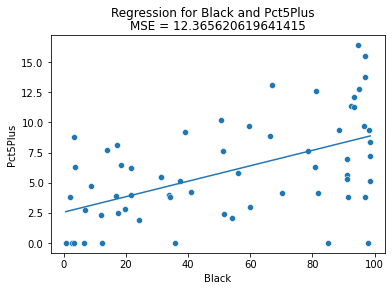

12.680685663750827


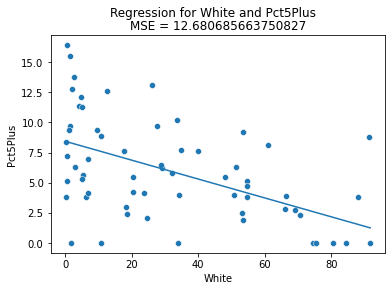

12.17040763737278


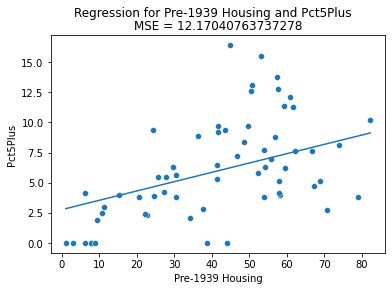

12.868312625009159


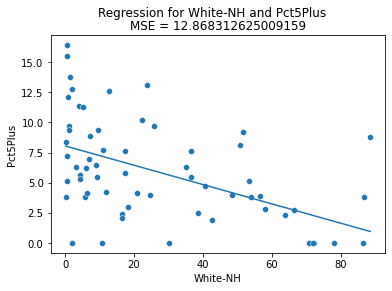

In [ ]:
# Code for Single Variable Linear Regression
# negative_columns = ['Bachelor', 'White', 'White-NH', 'Asian', 'Asian-NH', 'OwnerOccupied', 'White-H']
# positive_columns = ['Poverty','Black','Black-NH','Pre-1939 Housing','VacantHousing','OldHousing']
# # train model
for var in vars:

  model = LinearRegression() #initializes a linear regression model object
  model.fit(x_train[[var]], y_train) #modifies the object, called "model"

  # test model
  predictions = model.predict(x_test[[var]])
  intercepts = model.intercept_
  coeff = model.coef_
  mse = metrics.mean_squared_error(y_test, predictions)
  print(mse)
  #vars = negative_columns
  plt.figure()
  sns.scatterplot(x = x_test[var], y = y_test)
  sns.lineplot(x = x_test[var],y= predictions)
  plt.suptitle('Regression for ' + str(var) +' and Pct5Plus')
  plt.title('MSE = ' + str(mse))
  plt.show()

9.08250595502207


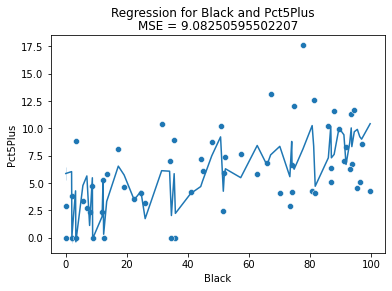